In [3]:
# set up the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read the test measurements
fname = "testpulsesingle.txt"

samplespersecond = 1
measurements = [ ]
for fline in open(fname):
    sfline = fline.split()
    samplespersecond = max(samplespersecond, len(sfline))
    measurements.extend(int(v)  for v in sfline)
print(len(measurements), "(at %d per second)"%samplespersecond)

1500 (at 100 per second)


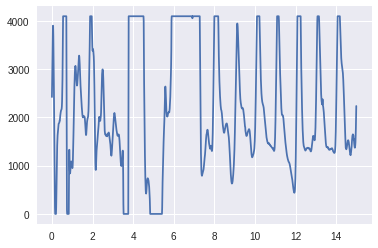

In [5]:
plt.plot([x/samplespersecond  for x in range(len(measurements))], measurements)

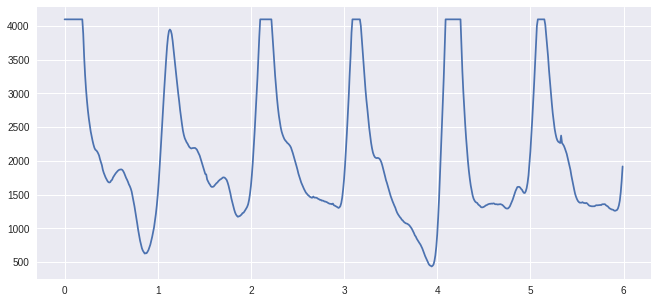

In [8]:
plt.figure(figsize=(11, 5))

t0, t1 = 8, 14
lmeasurements = measurements[t0*samplespersecond:t1*samplespersecond]
plt.plot([x/samplespersecond  for x in range(len(lmeasurements))], lmeasurements)


In [21]:
# make a function instead so we can plot at different sample rates
def readmeasurements(fname):
    samplespersecond = 1
    measurements = [ ]
    for fline in open(fname):
        sfline = fline.split()
        samplespersecond = max(samplespersecond, len(sfline))
        measurements.extend(int(v)  for v in sfline)
    return samplespersecond, measurements


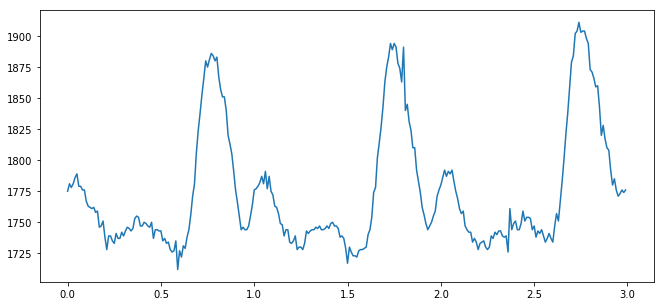

In [26]:
# 100 sample rate
samplespersecond, measurements = readmeasurements("testpulsesingle100.txt")
plt.figure(figsize=(11, 5))

lmeasurements = measurements[5*samplespersecond:8*samplespersecond]
plt.plot([x/samplespersecond  for x in range(len(lmeasurements))], lmeasurements)


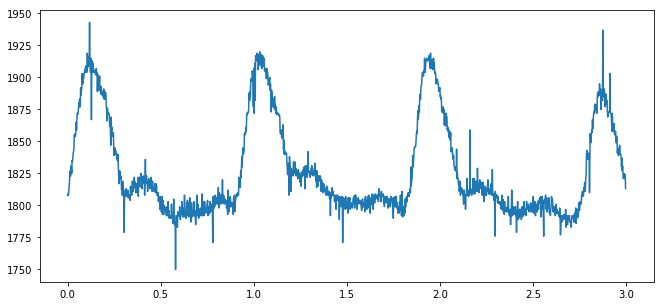

In [27]:
# 500 sample rate
samplespersecond, measurements = readmeasurements("testpulsesingle500.txt")
plt.figure(figsize=(11, 5))

lmeasurements = measurements[5*samplespersecond:8*samplespersecond]
plt.plot([x/samplespersecond  for x in range(len(lmeasurements))], lmeasurements)


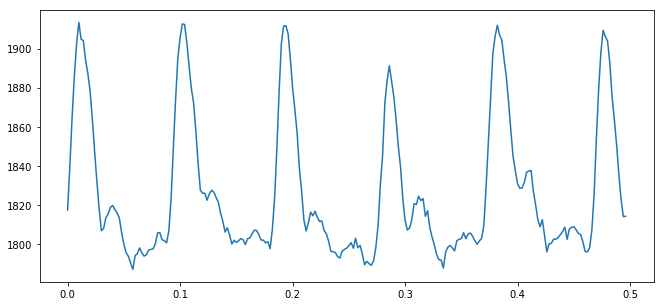

In [33]:
# Do an average sample of 10 consecutive samples to make it smooth
nsampleaverage = 10
gmeasurements = [ sum(measurements[i-nsampleaverage:i])/nsampleaverage  \
                  for i in range(nsampleaverage, len(measurements), nsampleaverage) ]

plt.figure(figsize=(11, 5))
lgmeasurements = gmeasurements[int(5*samplespersecond/nsampleaverage):int(8*samplespersecond/nsampleaverage)]
plt.plot([x/samplespersecond  for x in range(len(lgmeasurements))], lgmeasurements)


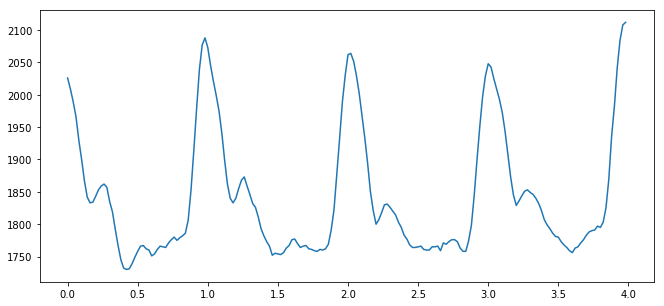

In [36]:
samplespersecond, measurements = readmeasurements("testpulsesingle50avg.txt")
plt.figure(figsize=(11, 5))

lmeasurements = measurements[5*samplespersecond:9*samplespersecond]
plt.plot([x/samplespersecond  for x in range(len(lmeasurements))], lmeasurements)
